In [1]:
%reload_ext autoreload
%autoreload 2

import os
import sys
import numpy as np
from astropy import units as u
from astropy import constants as c
import gc
from tqdm import tqdm
from scipy import interpolate

sys.path.append(os.environ['DM21CM_DIR'])
from dm21cm.injections.pbh import PBHAccretionInjection
from dm21cm.utils import load_h5_dict
from analysis.limits import get_limits

import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc_file('../../matplotlibrc')

In [ ]:
m_PBH_s = [1e-4, 1e-2, 1e0, 1e2, 1e4, 1e6]
model_s = ['BHLl2']

z_s = np.geomspace(4, 1000, 100)

unity = (1 * u.eV/u.s/u.cm**3 / c.c**2).to(u.M_sun/u.yr/u.Mpc**3)

cf_halo_power_d = {}
cf_cosmo_power_d = {}
cf_total_power_d = {}
for model in model_s:
    for m_PBH in m_PBH_s:
        inj = PBHAccretionInjection(model, m_PBH=m_PBH, f_PBH=1)
        k = model + f' {np.log10(m_PBH):.0f}'
        cf_halo_power_d[k] = np.array([inj.inj_power(z, debug='halo only') / (1+z)**3 for z in z_s]) * unity.value
        cf_cosmo_power_d[k] = np.array([inj.inj_power(z, debug='cosmo only') / (1+z)**3 for z in z_s]) * unity.value
        cf_total_power_d[k] = cf_halo_power_d[k] + cf_cosmo_power_d[k]
        del inj
        gc.collect()

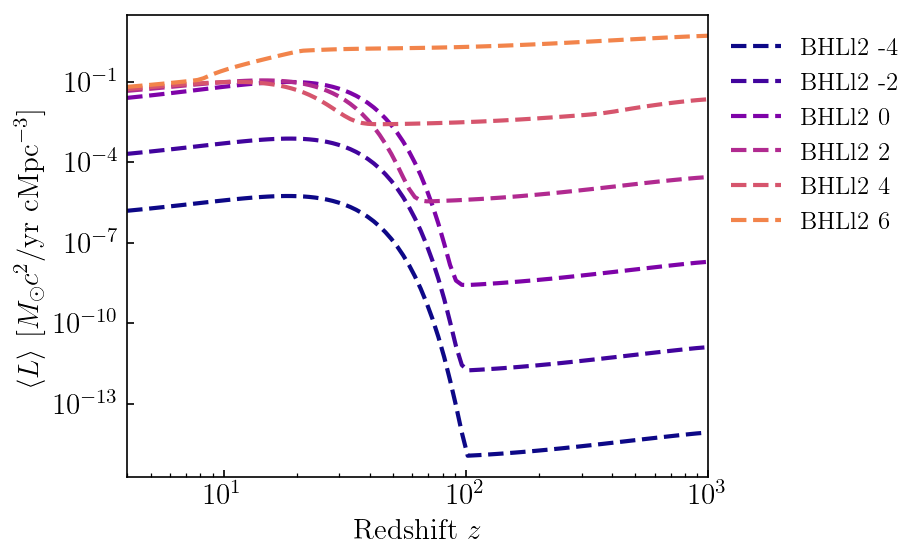

In [5]:
color_s = mpl.colormaps['plasma']([0.0, 0.1, 0.25, 0.4, 0.55, 0.7, 0.85, 1.0])

fig, ax = plt.subplots(1, 1, figsize=(5, 4))

for i, m_PBH in enumerate(m_PBH_s):
    # k = 'PRc23' + f' {np.log10(m_PBH):.0f}'
    # ax.plot(z_s, cf_total_power_d[k], color=color_s[i], ls='-', label=k)
    k = 'BHLl2' + f' {np.log10(m_PBH):.0f}'
    ax.plot(z_s, cf_total_power_d[k], color=color_s[i], ls='--', label=k)
ax.set(xscale='log', yscale='log')
ax.set(xlim=(4, 1000))
ax.set(xlabel=r'Redshift $z$', ylabel=r'$\langle L\rangle$ [$M_\odot c^2$/yr cMpc$^{-3}$]')
legend = ax.legend(frameon=False, fontsize=12, bbox_to_anchor=(1, 1))

# fig.savefig('pbhacc-L-z.pdf', bbox_inches='tight')